In [30]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import math

Let's define a function to create a multi index dataframe based on event and player name. This will allow us to consolidate the data with unquie keys.

In [31]:
def multi_indexing(df: pd.DataFrame, stats: dict[str, str]) -> pd.DataFrame:
    # set the multi index based on event & player name
    multiIndexDf = df.set_index(['EVENT', 'PLAYER NAME'], inplace=False)

    rtnDf = multiIndexDf[[*stats.keys()]]

    return rtnDf.rename(columns=stats)


In [32]:
csvs = ["driving_distance", "driving_accuracy", "greens_in_regulation", "proximity_to_the_hole","scrambling","sand_saves","putts_per_round"]

statsMap = {
  "driving_distance" : {
    'AVG.' : 'Driving Distance',
    'TOTAL DRIVES' : 'Total Drives'
  },
  "driving_accuracy": {
    '%' : 'Fairways Hit (%)',
    'FAIRWAYS HIT':  'Fairsways Hit',
    'POSSIBLE FAIRWAYS' : 'Possible Fairways'
  },
  "greens_in_regulation": {
    '%' : 'Greens Hit (%)'
  },
     "proximity_to_the_hole": {
    'AVG' : 'Hole Proximity'
  },
    "putts_per_round": {
    'AVG' : 'Putts'
  },
  "sand_saves": {
    '%' : 'Sand Saves (%)',
    '# SAVES': 'Sand Saves',
    '# BUNKERS' : 'Bunkers'
  },
  "scrambling" : {
    '%' : 'Scrambling (%)',
    'PAR OR BETTER' : 'Scarmbling',
    'MISSED GIR' : 'Missed GIR'
  },
}

In [33]:
# set up inital scoring df
scoringDf = pd.read_csv('../data/raw_data/scoring_average.csv')
aggratedData = multi_indexing(scoringDf, {'AVG': 'Score'})

for file in csvs:
    currDf = pd.read_csv(f'../data/raw_data/{file}.csv')
    currDict = statsMap[file]
    
    cleanedDf = multi_indexing(currDf, currDict)
    aggratedData = pd.merge(aggratedData, cleanedDf, on=['EVENT', 'PLAYER NAME'])

aggratedData.head()

Score  Driving Distance  Total Drives  \
EVENT     PLAYER NAME                                                 
U.S. Open Matt Fitzpatrick   65.903             310.5             8   
          Scottie Scheffler  66.153             313.3             8   
          Will Zalatoris     66.153             306.3             8   
          Hideki Matsuyama   66.653             295.9             8   
          Rory McIlroy       66.903             300.9             8   

                             Fairways Hit (%)  Fairsways Hit  \
EVENT     PLAYER NAME                                          
U.S. Open Matt Fitzpatrick              69.64             39   
          Scottie Scheffler             67.86             38   
          Will Zalatoris                55.36             31   
          Hideki Matsuyama              51.79             29   
          Rory McIlroy                  55.36             31   

                             Possible Fairways  Greens Hit (%) Hole Proximity  \
EVENT     PLAYER NAME                                                           
U.S. Open Matt Fitzpatrick                  56           72.22        35' 10"   
          Scottie Scheffler                 56           65.28         33' 9"   
          Will Zalatoris                    56           65.28         28' 3"   
          Hideki Matsuyama                  56           69.44         33' 7"   
          Rory McIlroy                      56           66.67         35' 2"   

                             Scrambling (%)  Scarmbling  Missed GIR  \
EVENT     PLAYER NAME                                                 
U.S. Open Matt Fitzpatrick            60.00          12          20   
          Scottie Scheffler           60.00          15          25   
          Will Zalatoris              52.00          13          25   
          Hideki Matsuyama            72.73          16          22   
          Rory McIlroy                54.17          13          24   

                             Sand Saves (%)  Sand Saves  Bunkers  Putts  
EVENT     PLAYER NAME                                                    
U.S. Open Matt Fitzpatrick            42.86           3        7  30.50  
          Scottie Scheffler           50.00           3        6  27.75  
          Will Zalatoris              60.00           3        5  28.25  
          Hideki Matsuyama            42.86           3        7  29.25  
          Rory McIlroy               100.00           5        5  29.00

Now let's clean and understand the features behaviours.

In [35]:
#format the hole proximity to a feet number (XX/' X")
def format_feet(x: str) -> str:
    # format 30' 5"
    splitList = x.split("' ")
    ft = float(splitList[0])
    inch = float(splitList[1].replace('"', ''))
    return str(round(ft + inch/12, 2))

aggratedData['Hole Proximity'] = aggratedData['Hole Proximity'].apply(lambda x: format_feet(x))

In [36]:
# graph all features to understand the distribution
def print_hist(df: pd.DataFrame):
    fig, ax = plt.subplots(3, math.ceil(len(df.columns)/3), figsize=(20, 10))
    
    pointer = 0
    
    for i in range(3):
        for j in range(math.ceil(len(df.columns)/3)):
             ax[i][j].hist(df.iloc[:, pointer])
             ax[i][j].set_title(df.columns[pointer])
             pointer += 1
       
        
    fig.tight_layout()    
    plt.show()

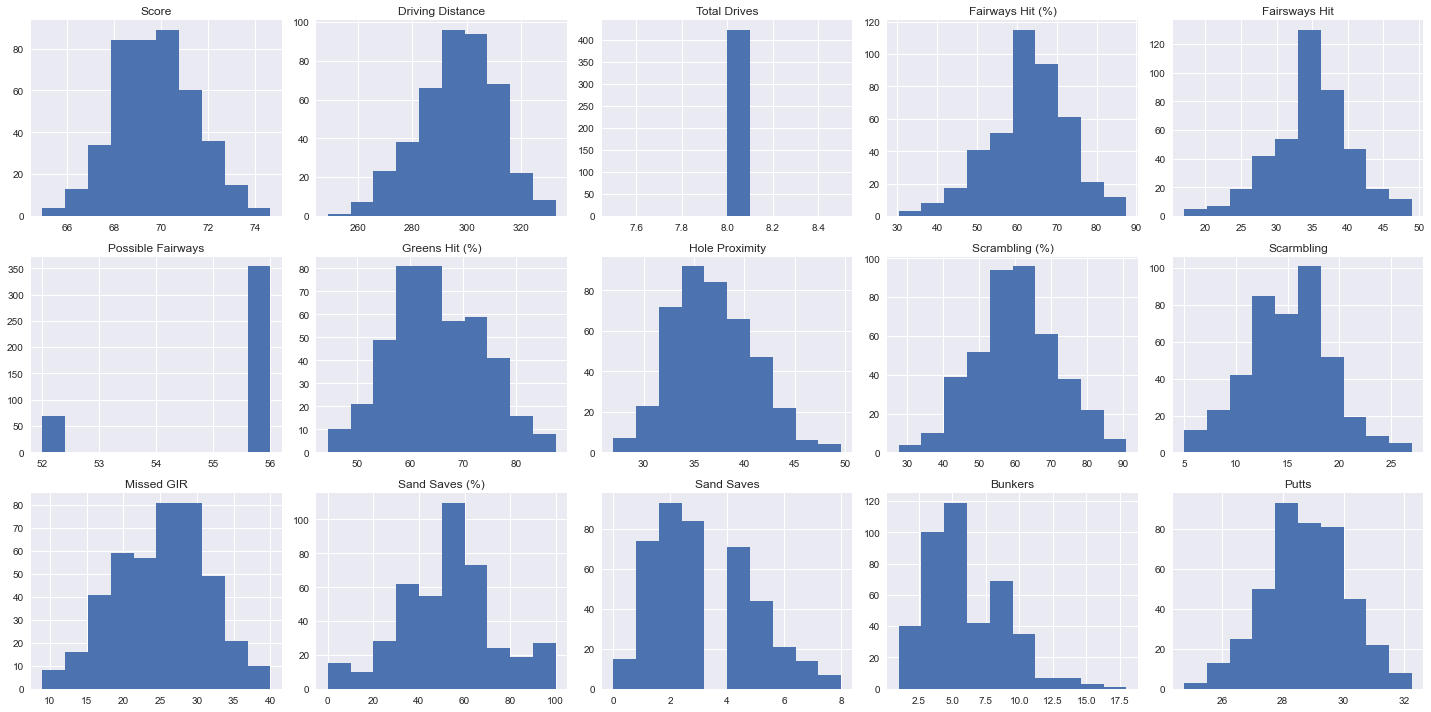

In [ ]:
print_hist(aggratedData)

Now I want to choose features that are normally distributed and contain relevent information.

In [41]:
selectedData = aggratedData[['Score', 'Driving Distance', 'Fairways Hit (%)', 'Greens Hit (%)', 'Hole Proximity', 'Scrambling (%)','Sand Saves (%)', 'Putts']]
noIndexDf = selectedData.reset_index(drop=True)
noIndexDf.to_csv('../data/cleaned_data/cleaned_subset', index=False)